In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-28 17:06'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-28 17:06,Donald Trump Jr. just said something unreal ab...
1,2020-02-28 17:06,WHO increases coronavirus risk to 'very high';...
2,2020-02-28 17:06,Sen. Lindsey Graham: Biden will win SC primary...
3,2020-02-28 17:06,Bernie Sanders Overtakes Joe Biden in Fox News...
4,2020-02-28 17:06,Bloomberg says he will run 'right to the bitte...
5,2020-02-28 17:06,WHO raises coronavirus threat assessment to it...
6,2020-02-28 17:06,Sen. Tim Kaine endorses Joe Biden before key p...
7,2020-02-28 17:06,Pence is leading the coronavirus response but ...
8,2020-02-28 17:06,Education department says USC failed to protec...
9,2020-02-28 17:06,"Biden reverses course, admits he didn’t get ar..."


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
7,Pence is leading the coronavirus response but ...
11,Dow Hurtles Toward Bear Market as Coronavirus ...
17,United Airlines slashes Asia service because o...
35,Why the Silent Spread of Coronavirus Might Act...
36,This Is How The CDC Thinks The Coronavirus Mig...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-28 17:06:00,2020-02-28 17:06,"Why Patriots Should Wait On QB, Take Jalen Hur...",0,157
2020-02-28 17:06:00,2020-02-28 17:06,Chinese swimmer Sun Yang gets 8-year ban for d...,0,157
2020-02-28 17:06:00,2020-02-28 17:06,UFC on ESPN+ 27 weigh-in results: Two fighters...,0,157


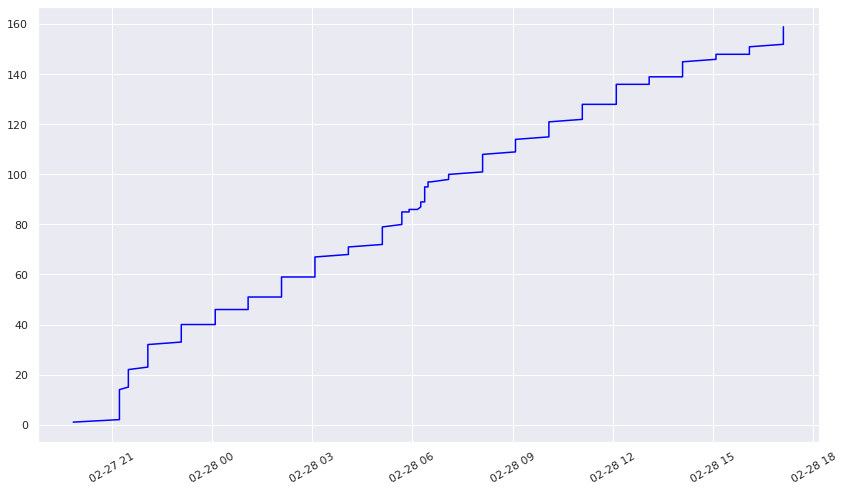

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
